In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testing/test_loan.csv
/kaggle/input/training/train_loan.csv


**Importing Libraries**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

**Data Understanding**

In [4]:
df=pd.read_csv('/kaggle/input/training/train_loan.csv')

In [5]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.nunique()
#displaying the numer of distinct values for each columns

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

In [8]:
cat_col=[]
num_col=[]
for col in df.columns:
    if (df[col].dtype=='object'):
        cat_col.append(col)
    else:
        num_col.append(col)
#seperatig the categorical columns from the numerical columns to make the data understanding easier


In [9]:
cat_col

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

*1. Categorical data*

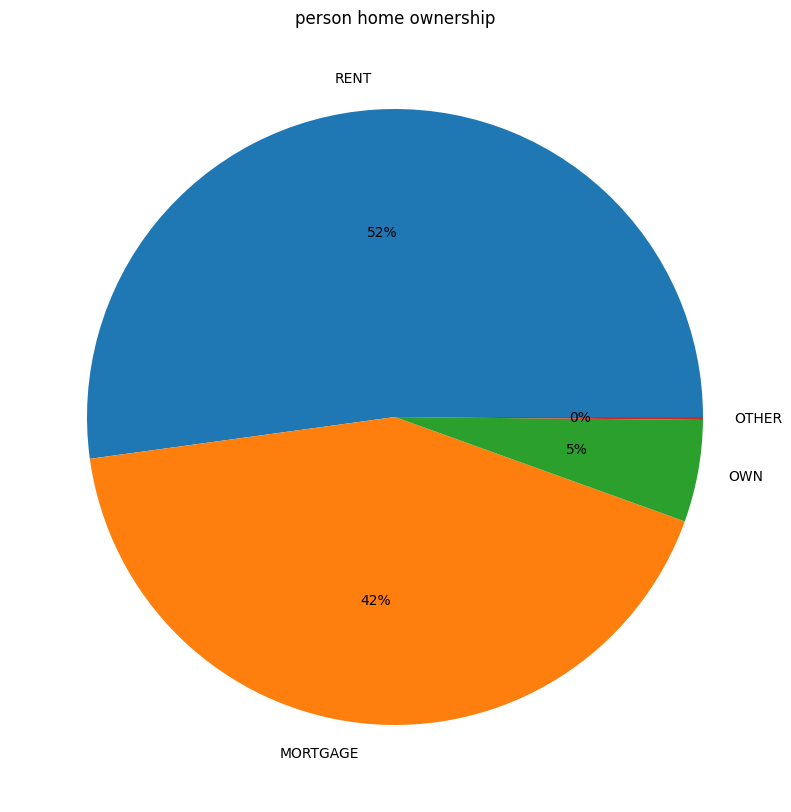

In [10]:
plt.figure(figsize=(10,10))
keys = df["person_home_ownership"].value_counts().keys()
values = df["person_home_ownership"].value_counts().values
plt.pie(values, labels=keys, autopct='%.0f%%')
plt.title('person home ownership')
plt.show()

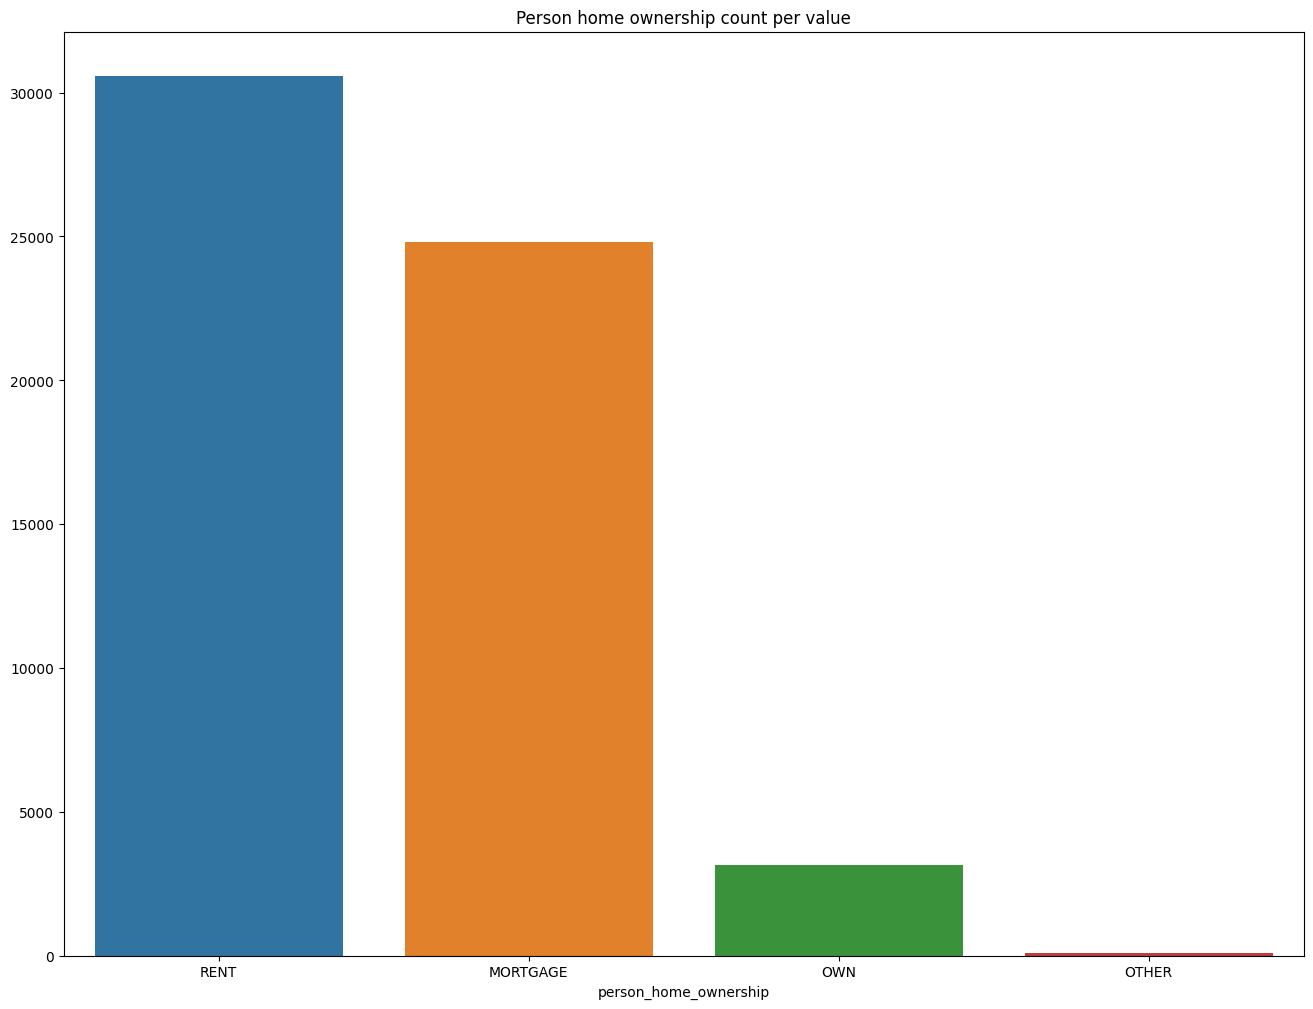

In [11]:
plt.figure(figsize=(16,12))
plt.title("Person home ownership count per value")
sns.barplot(x=keys,y=values)
plt.show()

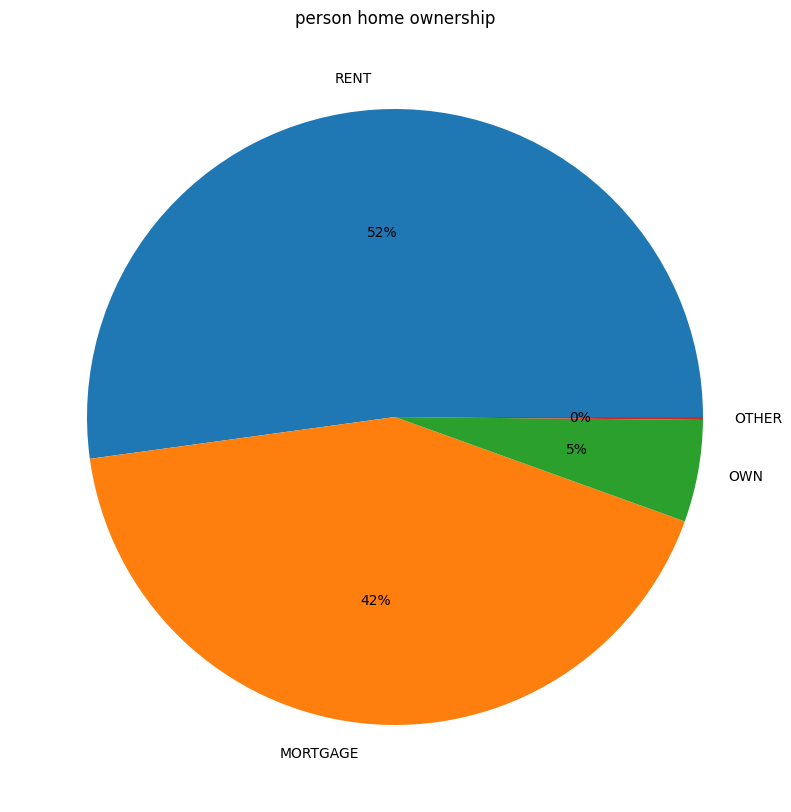

In [12]:
plt.figure(figsize=(10,10))
keys = df["person_home_ownership"].value_counts().keys()
values = df["person_home_ownership"].value_counts().values
plt.pie(values, labels=keys, autopct='%.0f%%')
plt.title('person home ownership')
plt.show()

In [13]:
df_grouped_loan_ownership = df.groupby(['loan_status', 'person_home_ownership']).agg(ownership_count=('person_home_ownership', 'count')).reset_index()

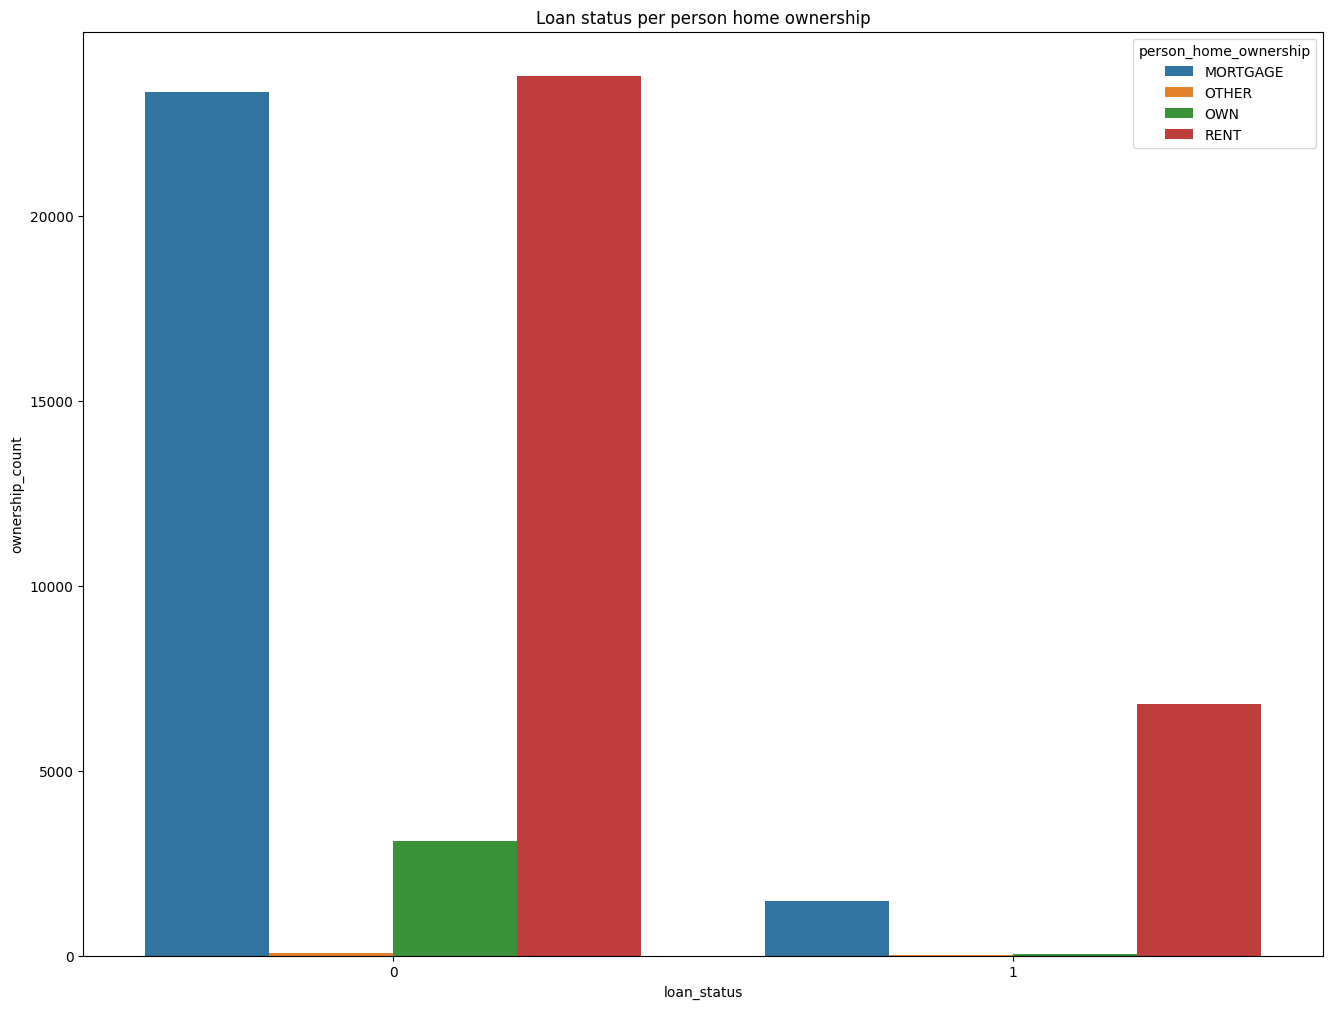

In [14]:
plt.figure(figsize=(16,12))
plt.title("Loan status per person home ownership")
sns.barplot(data=df_grouped_loan_ownership,x="loan_status",y='ownership_count',hue='person_home_ownership')
plt.show()

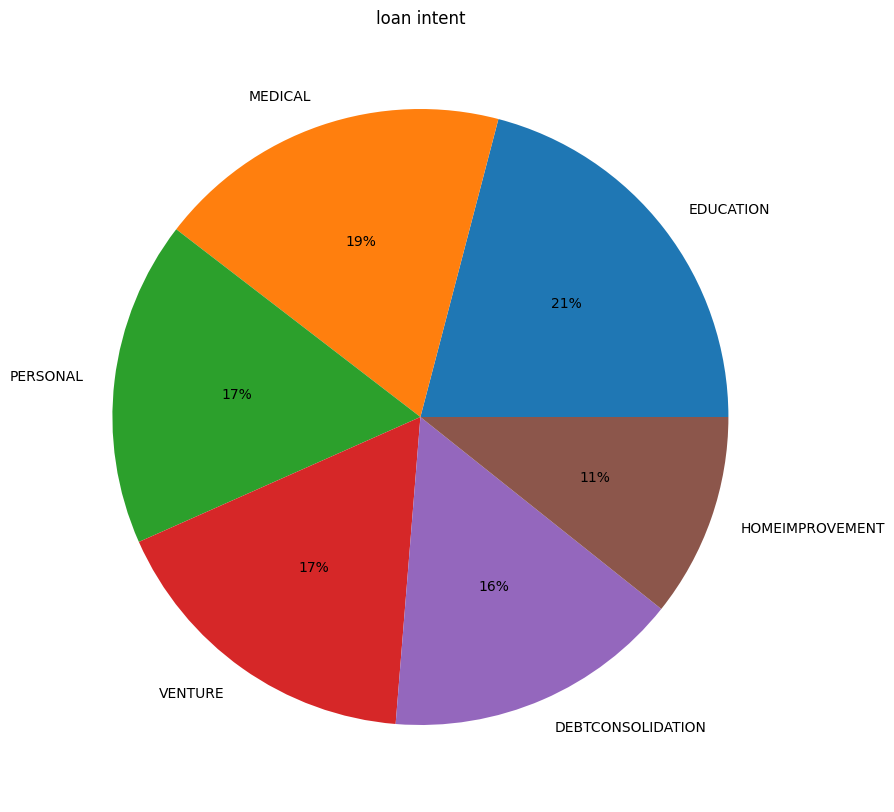

In [15]:
plt.figure(figsize=(10,10))
keys = df["loan_intent"].value_counts().keys()
values = df["loan_intent"].value_counts().values
plt.pie(values, labels=keys, autopct='%.0f%%')
plt.title('loan intent')
plt.show()

the intentions have almost the same %

In [16]:
df_grouped_loan_intent = df.groupby(['loan_status', 'loan_intent']).agg(intent_count=('loan_intent', 'count')).reset_index()

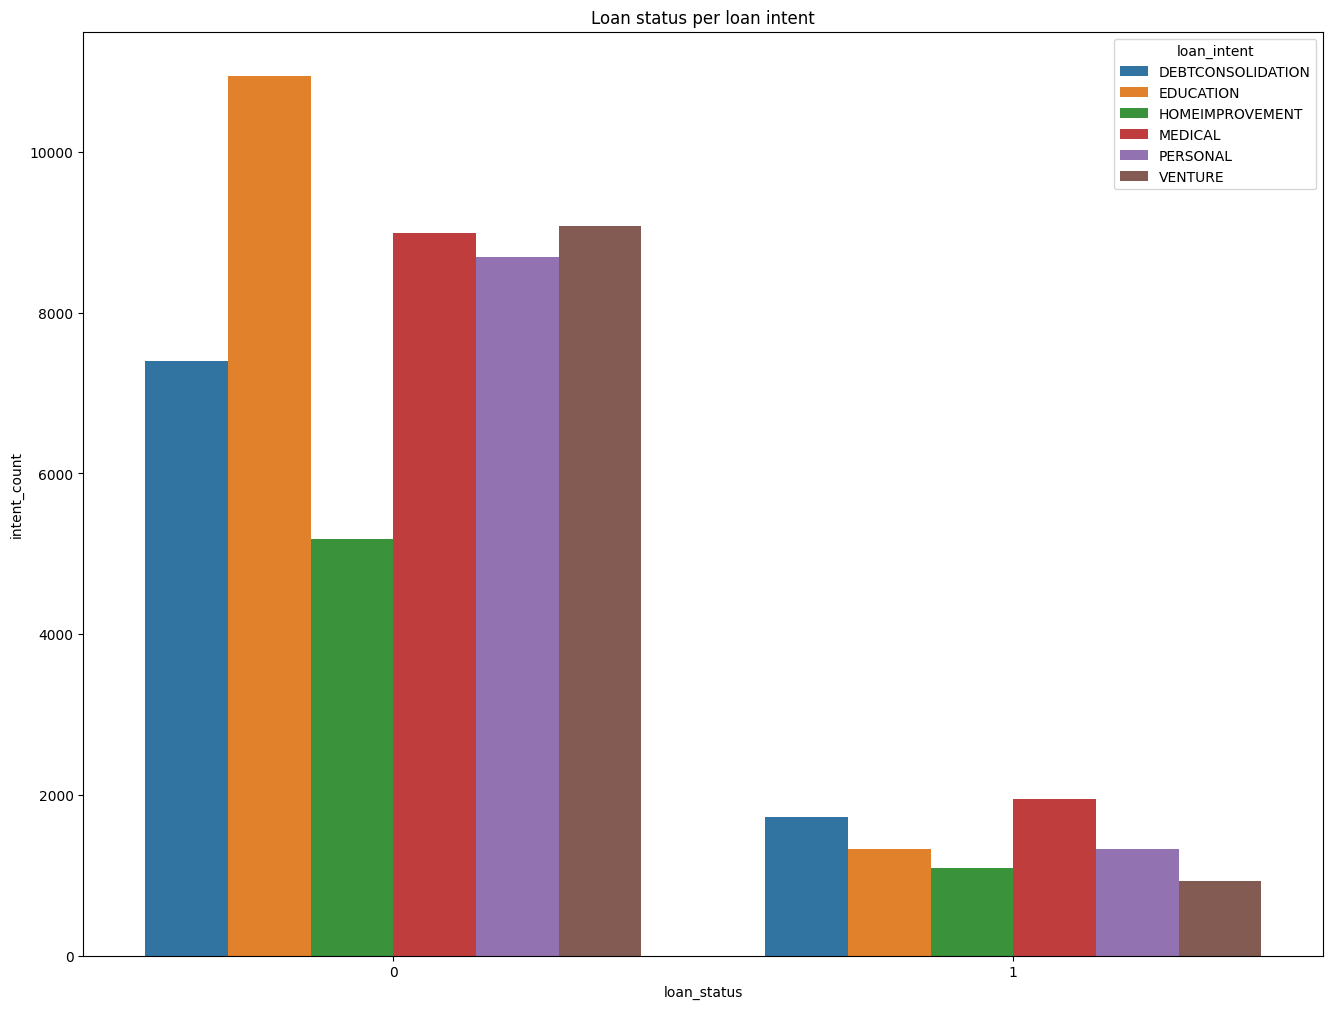

In [17]:
plt.figure(figsize=(16,12))
plt.title("Loan status per loan intent")
sns.barplot(data=df_grouped_loan_intent,x="loan_status",y='intent_count',hue='loan_intent')
plt.show()

the persons who take students loan are the most rejected, however the persons who take loanns for medical or debt consolidation reasons have more chances to have their loan granted


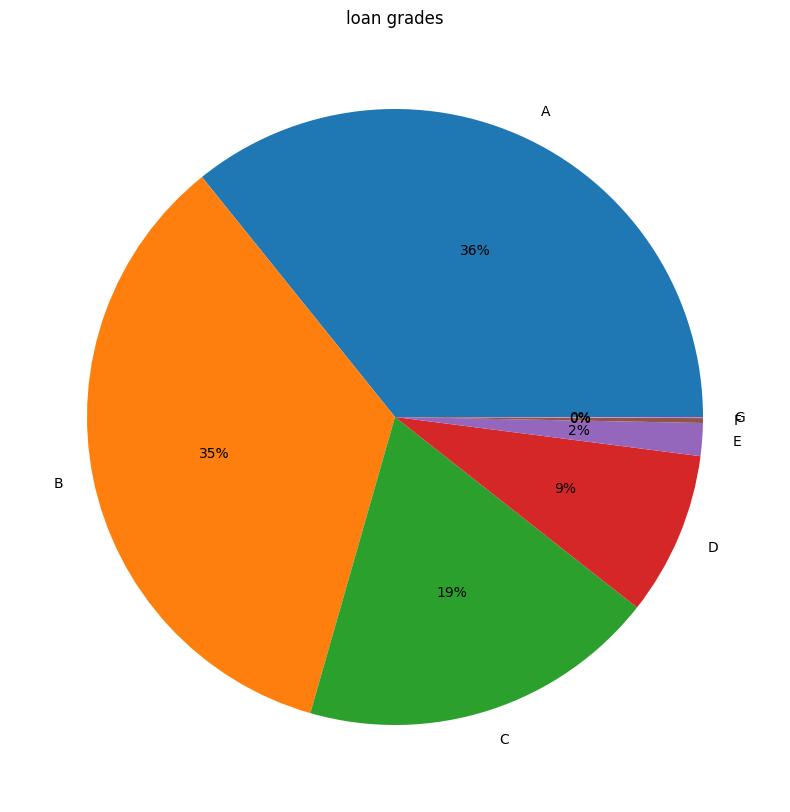

In [18]:
plt.figure(figsize=(10,10))
keys = df["loan_grade"].value_counts().keys()
values = df["loan_grade"].value_counts().values
plt.pie(values, labels=keys, autopct='%.0f%%')
plt.title('loan grades')
plt.show()

We can notice from this plot that most of the persons applying for a loan are either renting a house or have a mortage on their houses


In [19]:
df_grouped_grade=df.groupby(["loan_status","loan_grade"]).agg(grade_count=("loan_grade","count")).reset_index()

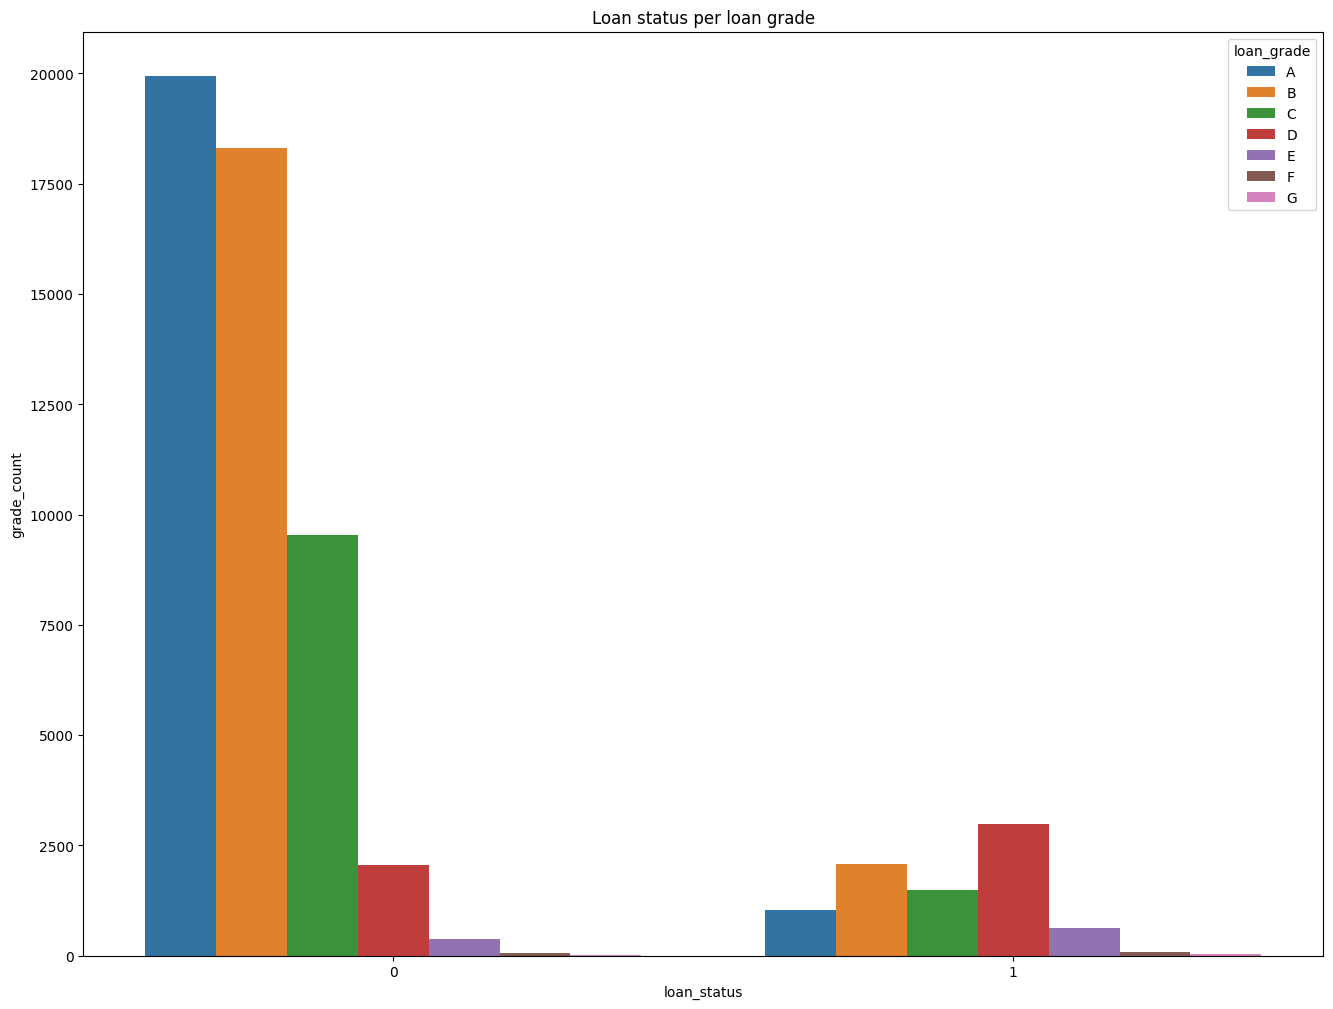

In [20]:
plt.figure(figsize=(16,12))
plt.title("Loan status per loan grade")
sns.barplot(data=df_grouped_grade,x="loan_status",y='grade_count',hue='loan_grade')
plt.show()

Despite the fact that grades A and B represent the majority of loan grades in our dataset, they are more likely to be rejected

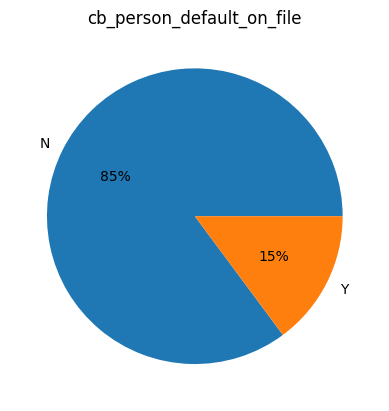

In [21]:
keys=df["cb_person_default_on_file"].value_counts().keys()
values=df["cb_person_default_on_file"].value_counts().values
plt.pie(values,labels=keys,autopct="%.0F%%")
plt.title("cb_person_default_on_file")
plt.show()

In [22]:
df_grouped_loans_cb=df.groupby(["loan_status","cb_person_default_on_file"]).agg(cb_count=("cb_person_default_on_file",'count')).reset_index()

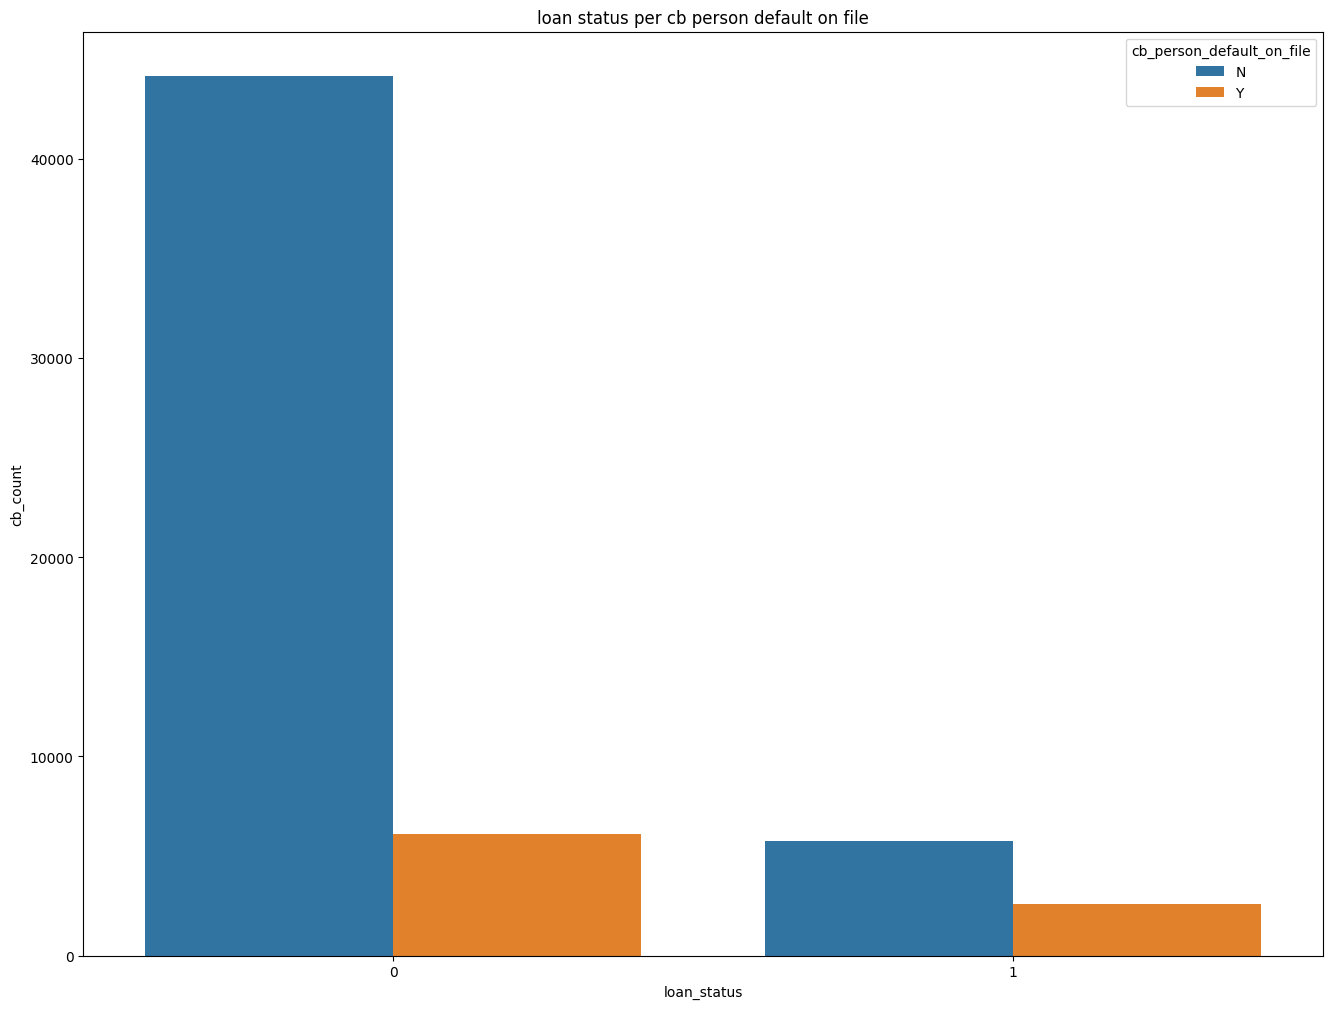

In [23]:
plt.figure(figsize=(16,12))
plt.title("loan status per cb person default on file")
sns.barplot(data=df_grouped_loans_cb,x="loan_status",y='cb_count',hue='cb_person_default_on_file')
plt.show()

Numerical Data

<Axes: xlabel='person_income'>

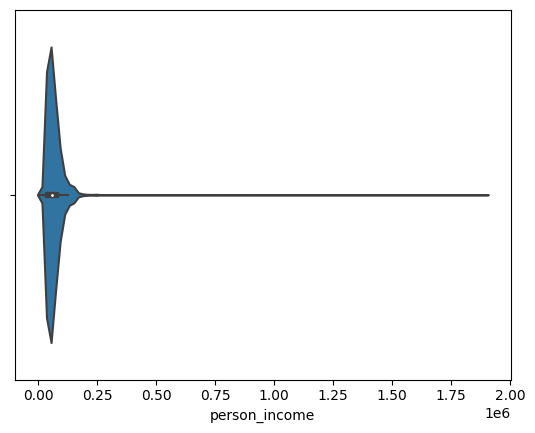

In [24]:
sns.violinplot(x=df["person_income"])

<Axes: xlabel='loan_status', ylabel='person_income'>

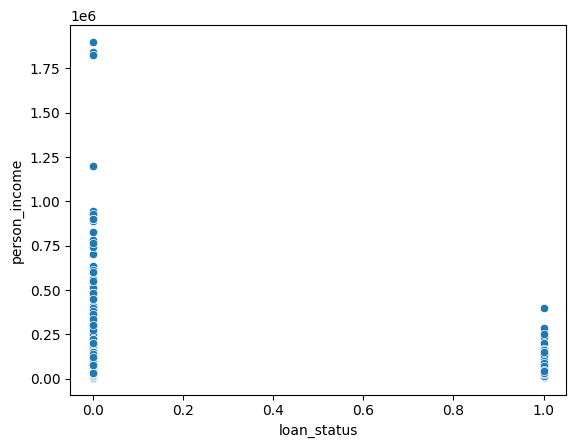

In [25]:
sns.scatterplot(data=df,y='person_income',x='loan_status')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

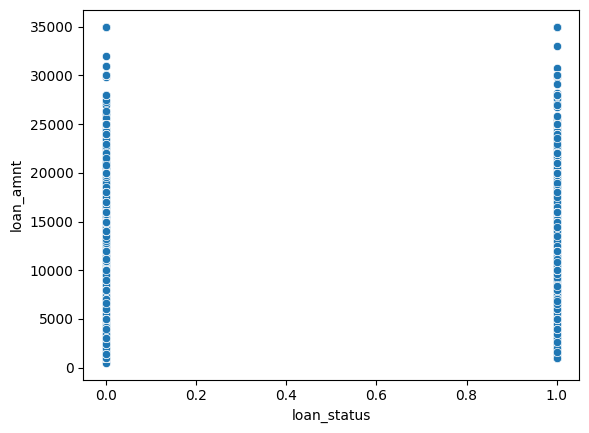

In [26]:
sns.scatterplot(data=df,y='loan_amnt',x='loan_status')

Almost the same, loan amount might be useless in the prediction


Preparing the data for modeling

In [27]:
le=LabelEncoder()

In [28]:
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [29]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10,0
58641,58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1
58642,58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1
58643,58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0


In [30]:
for col in num_col:
    print(col,df[col].max(),df[col].min())

id 58644 0
person_age 123 20
person_income 1900000 4200
person_emp_length 123.0 0.0
loan_amnt 35000 500
loan_int_rate 23.22 5.42
loan_percent_income 0.83 0.0
cb_person_cred_hist_length 30 2
loan_status 1 0


In [31]:
num_col=[x for x in num_col if x not in ["id","loan_status",'loan_percent_income']]

In [32]:
scaler=MinMaxScaler()

In [33]:
for col in num_col:
    df[col]=scaler.fit_transform(df[[col]])

In [34]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,0.165049,0.016246,3,0.000000,1,1,0.159420,0.341011,0.17,0,0.428571,0
1,1,0.019417,0.027324,2,0.048780,3,2,0.101449,0.445506,0.07,0,0.000000,0
2,2,0.087379,0.012976,2,0.065041,4,0,0.159420,0.195506,0.21,0,0.285714,0
3,3,0.097087,0.034708,3,0.113821,5,1,0.333333,0.319663,0.17,0,0.107143,0
4,4,0.019417,0.029433,3,0.016260,3,0,0.159420,0.084270,0.10,0,0.035714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,0.135922,0.061082,0,0.040650,1,3,0.710145,0.591573,0.21,1,0.285714,0
58641,58641,0.077670,0.012976,3,0.000000,3,2,0.275362,0.410674,0.35,0,0.214286,1
58642,58642,0.029126,0.020994,3,0.056911,1,3,0.182609,0.594382,0.15,0,0.000000,1
58643,58643,0.019417,0.013609,3,0.016260,1,0,0.130435,0.195506,0.17,0,0.035714,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["id","loan_status"]), df["loan_status"], test_size=0.3, random_state=42)

**Modeling**

   1-XGBoostClassifier
   

In [36]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic')

In [37]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred=xgb.predict(X_test)

testing to define the threshold that will give us the best result

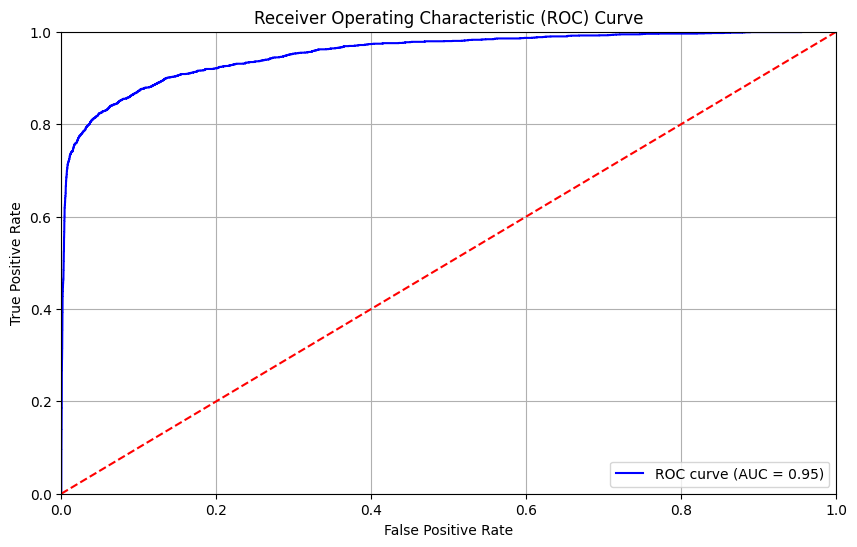


Best Threshold: 0.15
TPR at Best Threshold: 0.84, FPR at Best Threshold: 0.06


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc



# Get predicted probabilities
y_probs = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calculate Youden's J statistic and find the best threshold
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]
best_tpr = tpr[best_index]
best_fpr = fpr[best_index]

print(f'\nBest Threshold: {best_threshold:.2f}')
print(f'TPR at Best Threshold: {best_tpr:.2f}, FPR at Best Threshold: {best_fpr:.2f}')

In [40]:
#setting a threshold
result_proba = xgb.predict_proba(X_test)
result_boolean2= (result_proba[:,1] > 0.15)

Comparing the results of the default threhold and the chosen Threshold

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[14932,   645],
       [  194,  1823]])

In [42]:
confusion_matrix(result_boolean2,y_test)

array([[14169,   398],
       [  957,  2070]])

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9523132886211209
Precision: 0.9038175508180466
Recall (Sensitivity): 0.7386547811993517
F1-Score: 0.8129319955406913


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, result_boolean2)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, result_boolean2)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, result_boolean2)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, result_boolean2)
print("F1-Score:", f1)

Accuracy: 0.9229851085597363
Precision: 0.6838453914767096
Recall (Sensitivity): 0.8387358184764991
F1-Score: 0.7534121929026388


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
rc=roc_auc_score(y_pred,y_test)

In [46]:
rc

0.9312051739453268

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
rc=roc_auc_score(y_test,result_boolean2)

In [70]:
rc

0.8877336371240092

the chosen threshold gives us a worse roc value

2-Neural Network 

In [55]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [56]:
model=Sequential([Dense(units=128,activation="relu"),
                  Dense(units=64,activation="relu"),
                  Dense(units=32,activation="relu"),
                  Dense(units=16,activation="relu"),
                  Dense(units=1,activation="sigmoid"),
                 ])

In [57]:
model.compile(optimizer='Adam',loss=BinaryCrossentropy(),metrics=["AUC"])

In [60]:
norm_l=tf.keras.layers.Normalization(axis=-1)

In [61]:
#norm_l.adapt(X_train) c a n pas encore fonctionner

UnboundLocalError: local variable 'input_shape' referenced before assignment

In [65]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9406 - loss: 0.1649
Epoch 2/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9412 - loss: 0.1652
Epoch 3/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9409 - loss: 0.1696
Epoch 4/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9456 - loss: 0.1596
Epoch 5/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9448 - loss: 0.1604
Epoch 6/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9437 - loss: 0.1611
Epoch 7/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9446 - loss: 0.1613
Epoch 8/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9447 - loss: 0.1607
Epoch 9/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9457 - loss: 0.1621
Epoch 10/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9452 - loss: 0.1577
Epoch 11/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9478 - loss: 0.1549
Epoch 12/200
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9467 - lo

In [68]:
y_predict=model.predict(X_test)

550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [72]:
roc_auc = roc_auc_score(y_test, y_probs)

print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.90


In [66]:
def predict_classes(model, x,threshold, batch_size=32, verbose=0):
    proba = model.predict(x, batch_size=batch_size, verbose=verbose)
    return (proba >= threshold).astype('int32')

550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


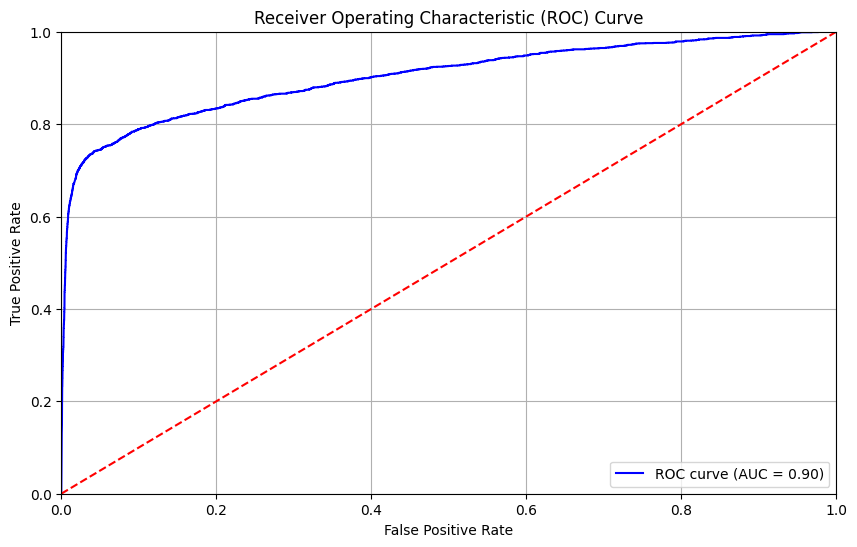


Best Threshold: 0.24
TPR at Best Threshold: 0.74, FPR at Best Threshold: 0.04


ValueError: Data must be 1-dimensional, got ndarray of shape (17594, 17594) instead

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Assume you have a trained model and test data (X_test and y_test)
# Get predicted probabilities
y_probs = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calculate Youden's J statistic to find the best threshold
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]
best_tpr = tpr[best_index]
best_fpr = fpr[best_index]

print(f'\nBest Threshold: {best_threshold:.2f}')
print(f'TPR at Best Threshold: {best_tpr:.2f}, FPR at Best Threshold: {best_fpr:.2f}')

# Optional: Visualize predicted classes for different thresholds
thresholds_to_test = np.linspace(0, 1, num=11)
for threshold in thresholds_to_test:
    predicted_classes = predict_classes(model, X_test, threshold)
    # Calculate performance metrics (e.g., accuracy)
    accuracy = np.mean(predicted_classes == y_test)
    print(f'Threshold: {threshold:.2f} - Accuracy: {accuracy:.2f}')


Bayisian Search

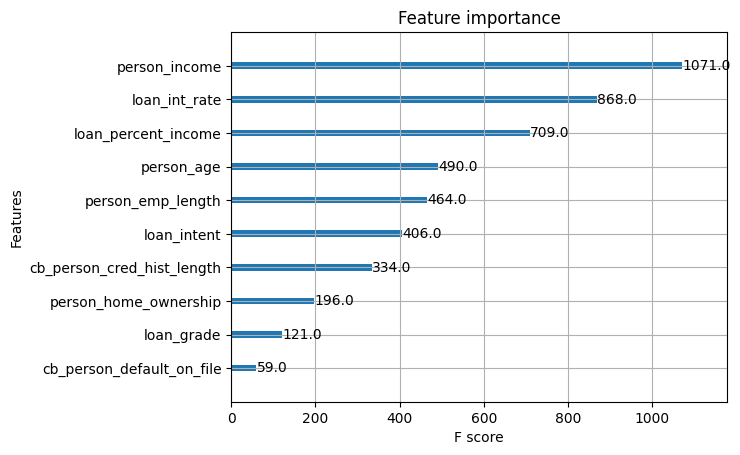

In [102]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

In [105]:
df.drop(columns="person_income",inplace=True)


In [124]:
test.drop(columns="person_income",inplace=True)

In [107]:
from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization

In [120]:
def prediction(n_estimators,max_depth,learning_rate):
  """
  this function predicts values using bayesian optimization
  """
  clf_iteration = XGBClassifier(n_estimators=int(n_estimators),\
                                         max_depth=int(max_depth),\
                                         learning_rate=float(learning_rate))
  clf_iteration.fit(X_train, y_train)
  y_pred_iteration = clf_iteration.predict(X_test)
  return roc_auc_score(y_test, y_pred_iteration)

In [121]:
pbounds = {'n_estimators':(100, 600),'max_depth':(10,40),'learning_rate':(0.01,0.1)}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = prediction,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 80)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 0.8607    | 0.09703   | 26.42     | 586.3     |
| 2         | 0.8588    | 0.07433   | 30.93     | 208.0     |
| 3         | 0.8617    | 0.09786   | 10.19     | 226.5     |
| 4         | 0.8573    | 0.04913   | 33.38     | 198.8     |
| 5         | 0.8587    | 0.08767   | 39.5      | 181.9     |
| 6         | 0.8534    | 0.01801   | 22.17     | 233.6     |
| 7         | 0.8613    | 0.08583   | 30.42     | 435.6     |
| 8         | 0.862     | 0.07916   | 11.24     | 227.2     |
| 9         | 0.8608    | 0.09322   | 14.56     | 221.7     |
| 10        | 0.8564    | 0.0202    | 37.99     | 432.6     |
| 11        | 0.8605    | 0.07464   | 24.73     | 437.0     |
| 12        | 0.8592    | 0.03104   | 30.47     | 442.6     |
| 13        | 0.8597    | 0.0439    | 10.0      | 232.7     |
| 14        | 0.8612    | 0.05414   | 26.56     | 430.0     |
| 15    

**TEST**

In [73]:
test=pd.read_csv('/kaggle/input/testing/test_loan.csv')

In [74]:
test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [75]:
for col in cat_col:
    test[col]=le.fit_transform(test[col])

In [76]:
for col in num_col:
    test[col]=scaler.fit_transform(test[[col]])

In [77]:
test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,0.040541,0.034283,3,0.071429,2,5,0.708455,0.619533,0.36,0,0.000000
1,58646,0.081081,0.048523,0,0.142857,4,2,0.271137,0.434991,0.10,1,0.071429
2,58647,0.081081,0.013713,3,0.119048,5,4,0.096210,0.705213,0.13,1,0.000000
3,58648,0.175676,0.024262,3,0.095238,0,0,0.183673,0.208508,0.14,0,0.178571
4,58649,0.081081,0.051688,0,0.190476,2,3,0.416910,0.653086,0.15,1,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,0.027027,0.014346,0,0.047619,0,1,0.067055,0.296585,0.10,0,0.071429
39094,97739,0.027027,0.023207,0,0.142857,1,0,0.183673,0.036549,0.15,0,0.035714
39095,97740,0.418919,0.029536,0,0.000000,4,0,0.416910,0.125225,0.25,0,0.821429
39096,97741,0.027027,0.016878,0,0.095238,4,3,0.387755,0.611144,0.39,1,0.071429


XGB

In [78]:
xgb.fit(df.drop(columns=['id','loan_status']),df['loan_status'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
pred=xgb.predict(test.drop(columns='id'))

In [92]:
result_proba = xgb.predict_proba(test.drop(columns='id'))
result_boolean2= (result_proba[:,1] > 0.14)

NNC

In [80]:
model.fit(df.drop(columns=['id','loan_status']),df['loan_status'],epochs=200)


Epoch 1/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9430 - loss: 0.1747
Epoch 2/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9475 - loss: 0.1622
Epoch 3/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9510 - loss: 0.1524
Epoch 4/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9523 - loss: 0.1519
Epoch 5/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9520 - loss: 0.1513
Epoch 6/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9532 - loss: 0.1455
Epoch 7/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9557 - loss: 0.1478
Epoch 8/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9521 - loss: 0.1486
Epoch 9/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9525 - loss: 0.1529
Epoch 10/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9533 - loss: 0.1483
Epoch 11/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9545 - loss: 0.1495
Epoch 12/200
1833/1833 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9560 - lo

In [82]:
y_predictions=model.predict(test.drop(columns='id'))

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [86]:
y_predictions = y_predictions.flatten()


**OUTPUT**

In [87]:
output = pd.DataFrame({'id': test["id"], 'loan_status': y_predictions})
output.to_csv('jdids.csv', index=False)